In [1]:
## INPUT
name="DescentIntoFuckery"

In [2]:
import ast
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter
import seaborn as sns
import datetime
%matplotlib inline
file = open("players/players_"+name+".txt", "r")
contents = file.read()
players = ast.literal_eval(contents)
file.close()
plyrs=list(set(players.values()))
print("Named in player File:",plyrs)
print("Appearing in Data:",pd.read_csv("rolls_"+name+".csv",sep=";")["Player"].unique())

Named in player File: ['Kallistē', 'Lulu', 'Reya Mantlemorn', 'Bethrynne', 'Smallfolk']
Appearing in Data: ['Smallfolk' 'Kallistē' 'Bethrynne' 'Bandit' 'Bandit Captain'
 'Fist of Bane' 'Iron Consul' 'Necromite of Myrkul' 'Master of Souls'
 'Skeletal Rats' 'Reaper of Bhaal' "Death's Head of Bhaal" 'Noble'
 'Cultist' 'Philaster Fisk' 'Amrik Vanthampur' 'Veteran' 'Helmed Horror'
 'Spined Devil' 'Guard' 'Tressym' 'Duke Thalamra Vanthampur'
 'Slobberchops' 'Klim Jhasso' 'Reya Mantlemorn' 'Barbed Devil'
 'Bearded Devil' 'Lulu' 'Hell Hound' 'White Abishai' 'Ulder Ravengard'
 'Minotaur Skeleton' 'Mezzoloth' 'Gideon Lightward' 'Minotaur'
 'Gnoll Fang of Yeenoghu' 'Gnoll Pack Lord' 'Gnoll' 'Giant Hyena'
 'Narzugon' 'Vampire' 'Vampire Spawn']


Select the Players and NPCs you want to include in the plots:

In [3]:
override=True
plotplyrs=['Smallfolk','Kallistē','Bethrynne','Slobberchops','Klim Jhasso','Reya Mantlemorn'] if override else plyrs
print(plotplyrs)

['Smallfolk', 'Kallistē', 'Bethrynne', 'Slobberchops', 'Klim Jhasso', 'Reya Mantlemorn']


In [4]:
skill_labels=['ACROBATICS',
 'ANIMAL HANDLING',
 'ARCANA',
 'ATHLETICS',
 'DECEPTION',
 'HISTORY',
 'INSIGHT',
 'INTIMIDATION',
 'INVESTIGATION',
 'MEDICINE',
 'NATURE',
 'PERCEPTION',
 'PERFORMANCE',
 'PERSUASION',
 'RELIGION',
 'SLEIGHT OF HAND',
 'STEALTH',
 'SURVIVAL']

attr_labels=['STRENGTH',
 'DEXTERITY',
 'CONSTITUTION',
 'INTELLIGENCE',
 'WISDOM',
 'CHARISMA']

save_labels=['STRENGTH SAVE',
 'DEXTERITY SAVE',
 'CONSTITUTION SAVE',
 'INTELLIGENCE SAVE',
 'WISDOM SAVE',
 'CHARISMA SAVE',
 'DEATH SAVE']

df=pd.read_csv("rolls_"+name+".csv",sep=";")
df["Timestamp"]=pd.to_datetime(df["Timestamp"])
df["Day"]=pd.to_datetime(df["Day"])

#df=df[(df["Day"]=="2021-02-23")|(df["Day"]=="2021-02-24")]
#df=df[df["Player"]=="Smallfolk"]
npcs=df[df["Player"].isin(plotplyrs)==False]
df=df[df["Player"].isin(plotplyrs)]

skills=df[df["Type"]=="Skill"].rename(columns={"Skill/Weapon/Spell": "Skill"})
attacks=df[df["Type"]=="Attack"].rename(columns={"Skill/Weapon/Spell": "Weapon/Spell"})
saves=df[df["Type"]=="Save"].rename(columns={"Skill/Weapon/Spell": "Save"})
other=df[df["Type"]=="Other"].rename(columns={"Skill/Weapon/Spell": "Skill"})

plyr_labels=plotplyrs

df

,Player,NPC,Timestamp,Skill/Weapon/Spell,Result,Raw,Plus,Final,Type,Day
0,Smallfolk,0,2021-01-03 19:36:00,STEALTH,25.0,19,6.0,1.0,Skill,2021-03-01
1,Kallistē,0,2021-01-03 19:38:00,DECEPTION,20.0,17,3.0,1.0,Skill,2021-03-01
2,Kallistē,0,2021-01-03 19:38:00,DECEPTION,11.0,8,3.0,0.0,Skill,2021-03-01
3,Bethrynne,0,2021-01-03 19:50:00,HISTORY,8.0,2,6.0,1.0,Skill,2021-03-01
4,Smallfolk,0,2021-01-03 19:50:00,HISTORY,12.0,12,0.0,1.0,Skill,2021-03-01
...,...,...,...,...,...,...,...,...,...,...
1880,Kallistē,0,2021-04-25 23:17:00,DEXTERITY SAVE,8.0,2,6.0,0.0,Save,2021-04-25
1881,Bethrynne,0,2021-04-25 23:17:00,DEXTERITY SAVE,15.0,12,3.0,1.0,Save,2021-04-25
1882,Smallfolk,0,2021-04-25 23:18:00,DEXTERITY SAVE,17.0,9,8.0,1.0,Save,2021-04-25
1887,Smallfolk,0,2021-04-25 23:30:00,Smith's Tools,23.0,15,8.0,1.0,Other,2021-04-25


## Skillchecks

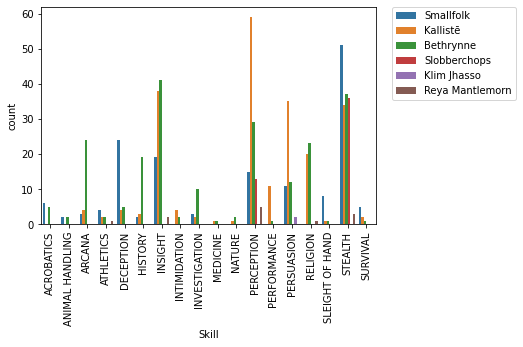

In [5]:
ax = sns.countplot(x="Skill", hue="Player", data=skills[skills["Final"]==1], order=skill_labels,hue_order=plyr_labels)
plt.xticks(rotation=90)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

Count of skillchecks per month and player

In [ ]:
#skills['Timestamp'].groupby([skills.Timestamp.dt.year, skills.Timestamp.dt.month, skills.Player,df.Final]).agg('count')

Average plusses on skillchecks

## Distribution of rolls

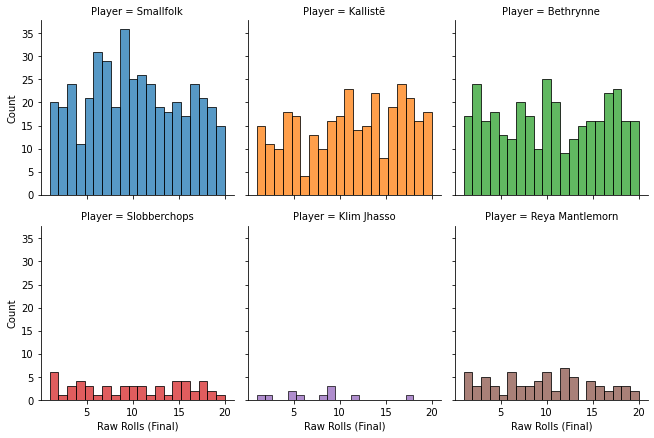

In [6]:
g = sns.FacetGrid(df[df["Final"]==1],col="Player",hue="Player",col_wrap=3,col_order=plyr_labels,hue_order=plyr_labels)
g.map_dataframe(sns.histplot, x="Raw",bins=20)
g.set_axis_labels("Raw Rolls (Final)", "Count")

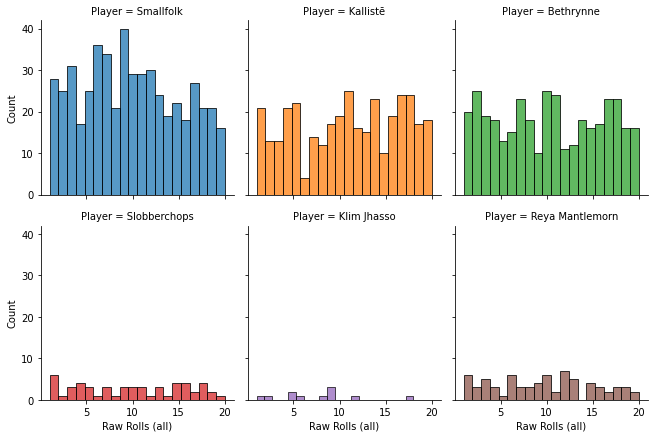

In [7]:
g = sns.FacetGrid(df,col="Player",hue="Player",col_wrap=3,col_order=plyr_labels,hue_order=plyr_labels)
g.map_dataframe(sns.histplot, x="Raw",bins=20)
g.set_axis_labels("Raw Rolls (all)", "Count")

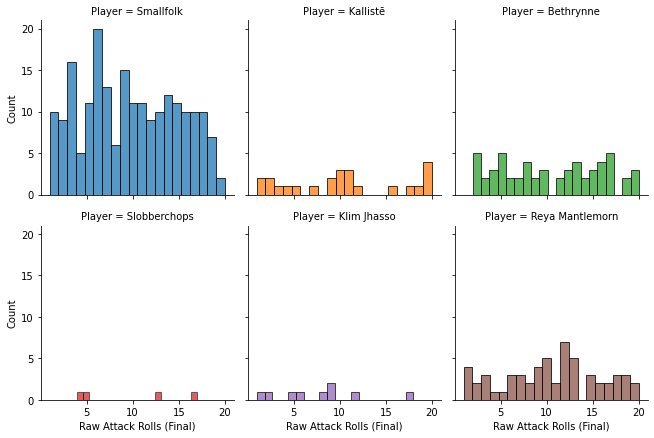

In [8]:
g = sns.FacetGrid(attacks[attacks["Final"]==1],col="Player",hue="Player",col_wrap=3,col_order=plyr_labels,hue_order=plyr_labels)
g.map_dataframe(sns.histplot, x="Raw",bins=20)
g.set_axis_labels("Raw Attack Rolls (Final)", "Count")

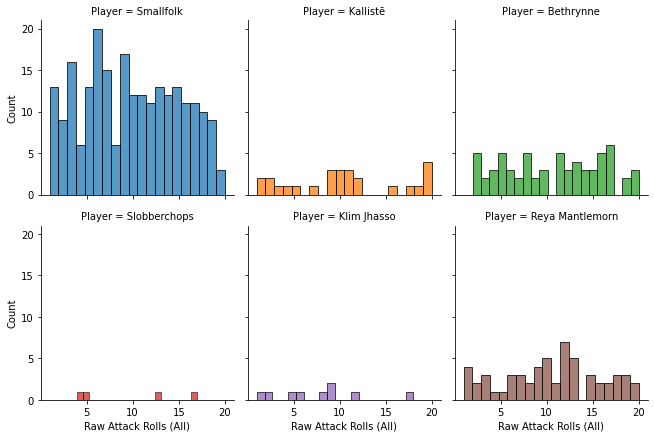

In [9]:
g = sns.FacetGrid(attacks,col="Player",hue="Player",col_wrap=3,col_order=plyr_labels,hue_order=plyr_labels)
g.map_dataframe(sns.histplot, x="Raw",bins=20)
g.set_axis_labels("Raw Attack Rolls (All)", "Count")

In [10]:
df['Raw'].groupby([df.Player]).agg('mean')

Player
Bethrynne          10.342541
Kallistē           10.956772
Klim Jhasso         7.636364
Reya Mantlemorn     9.647887
Slobberchops        9.924528
Smallfolk           9.877193
Name: Raw, dtype: float64

In [11]:
df['Raw'].groupby([df.Player]).agg('std')

Player
Bethrynne          5.903547
Kallistē           5.846878
Klim Jhasso        4.738623
Reya Mantlemorn    5.608918
Slobberchops       6.005924
Smallfolk          5.494540
Name: Raw, dtype: float64

## Crits

In [12]:
crits20=df[(df["Raw"]==20)]
crits1=df[(df["Raw"]==1)]

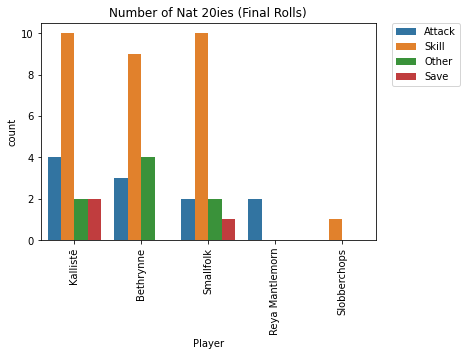

In [13]:
ax = sns.countplot(x="Player",hue="Type", data=crits20[crits20["Final"]==1])
plt.xticks(rotation=90)
plt.title("Number of Nat 20ies (Final Rolls)")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

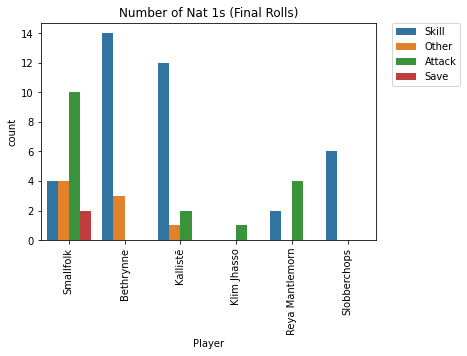

In [15]:
ax = sns.countplot(x="Player",hue="Type", data=crits1[crits1["Final"]==1])
plt.xticks(rotation=90)
plt.title("Number of Nat 1s (Final Rolls)")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

## Saves

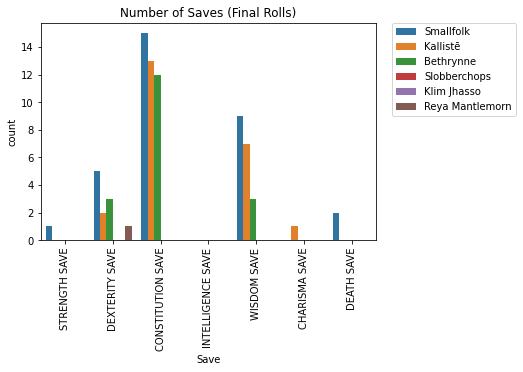

In [17]:
ax = sns.countplot(x="Save",hue="Player", data=saves[saves["Final"]==1],hue_order=plyr_labels,order=save_labels)
plt.xticks(rotation=90)
plt.title("Number of Saves (Final Rolls)")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

## Times

In [64]:
#df[["Timestamp"]].groupby([df["Day"]]).agg(lambda x: max(x.Timestamp)-min(x.Timestamp))

In [25]:
times=df[["Timestamp"]].groupby([df["Day"]]).agg(lambda x: max(x.Timestamp)-min(x.Timestamp))
len(times[times.Timestamp>datetime.timedelta(hours=2)])

10

## Attacks

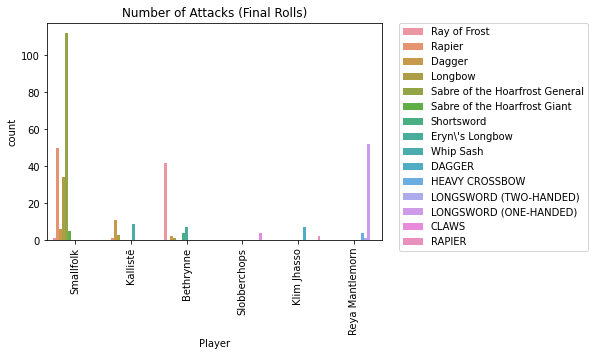

In [18]:
ax = sns.countplot(x="Player",hue="Weapon/Spell", data=attacks[attacks["Final"]==1],order=plyr_labels)
plt.xticks(rotation=90)
plt.title("Number of Attacks (Final Rolls)")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

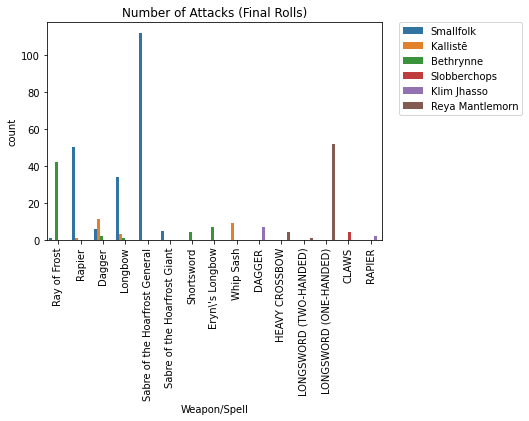

In [19]:
ax = sns.countplot(x="Weapon/Spell",hue="Player", data=attacks[attacks["Final"]==1],hue_order=plyr_labels)
plt.xticks(rotation=90)
plt.title("Number of Attacks (Final Rolls)")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

## NPCs

(array([30., 38., 24., 21., 29., 21., 27., 21., 19., 29., 37., 21., 24.,
        33., 22., 27., 31., 28., 27., 23.]),
 array([ 1.  ,  1.95,  2.9 ,  3.85,  4.8 ,  5.75,  6.7 ,  7.65,  8.6 ,
         9.55, 10.5 , 11.45, 12.4 , 13.35, 14.3 , 15.25, 16.2 , 17.15,
        18.1 , 19.05, 20.  ]),
 <BarContainer object of 20 artists>)

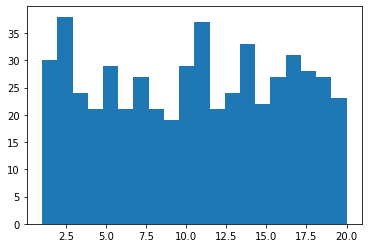

In [20]:
plt.hist(npcs["Raw"],bins=20)

In [21]:
npcs["Raw"].mean()

10.43233082706767